Project: UMBC Radar Classifier

Author: Marc Conn

Data File Format: num objects,std,var,mean,min,max,enviroment,object
The dataset consists of 18 input features and the expected object label.

Each row has 18 values in this order : 

    num objects,
    
    r std,
    
    r var,
    
    r mean,
    
    r min,
    
    r max,
    
    snr std,
    
    snr var,
    
    snr mean,
    
    snr min,
    
    snr max,
    
    noise std,
    
    noise var,
    
    noise mean,
    
    noise min,
    
    noise max,
    
    enviroment,
    
    object,
    
    height

an example row:
7,0.7793000517209305,0.607308570612245,1.0595714285714286,0.2182,2.5305,44.71953415112771,1999.8367346938776,144.85714285714286,114.0,246.0,47.51970590165297,2258.122448979592,533.8571428571429,490.0,589.0,dark,dime,7 inches

*notice in the sample that the height feature has a vale and the string 'inches' behind it. The string 'inches' has tobe stripped off of the value. 

This code as written process and classify the 5 classes of objects I collected data on

   [dime
   
   leadpencil,
   
   plasticsheet,
   
   quarter,
   
   wood]


Two or more nueral are were designed to perform classfication on the data sets.

Read the data from the data file and split it into training & test data sets. The test data set will be used for peroformance validation.


In [ ]:
# Importing required the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import torch.nn as nn
from sklearn.model_selection import train_test_split

In [ ]:

# Data Preprocessing

# # Import the dataset
# Data Preprocessing

# # Import the dataset
global onehotencoder_y


def fileReading(file_name):
    dataset = pd.read_table(file_name)
    X = dataset.iloc[:, 0:16].values
    print("features")
    print(X)
    
    y = dataset.iloc[:,-3].values

    


   



    #debug
    print("UNIQUE LABELS/CLASSES : ",np.unique(y))

    # one hot encode the out labels - required for training the NN.
    onehotencoder_y = OneHotEncoder(sparse=False)
    #print(onehotencoder_y)
    y=y.reshape(-1, 1) # reshape required for correct one hot encoding fit_transform()
    
    #print(onehotencoder_y.categories)
    y = onehotencoder_y.fit_transform(y)
    print(X)
    print(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    return X_train, X_test, y_train, y_test


X_sunnyData70_7_inch, X_sunnyData30_7_inch,y_sunnyData70_7_inch, y_sunnyData30_7_inch = fileReading("sunny_3.5_.txt") 
X_darkData70_7_inch, X_darkData30_7_inch,y_darkData70_7_inch, y_darkData30_7_inch = fileReading("night_3.5_.txt")
X_lablightData70_7_inch, X_lablightData30_7_inch, y_lablightData70_7_inch,y_lablightData30_7_inch = fileReading("lablight_3.5_.txt")

X_sunnyData70_53_inch, X_sunnyData30_53_inch,y_sunnyData70_53_inch, y_sunnyData30_53_inch = fileReading("sunny_7_.txt") 
X_darkData70_53_inch, X_darkData30_53_inch,y_darkData70_53_inch, y_darkData30_53_inch = fileReading("night_7_.txt")
X_lablightData70_53_inch, X_lablightData30_53_inch, y_lablightData70_53_inch,y_lablightData30_53_inch = fileReading("lablight_7_.txt")
 

# print(X_sunnyData70_7_inch.shape)
# print(X_sunnyData30_7_inch.shape)
# print(X_darkData70_7_inch.shape)
# print(X_darkData30_7_inch.shape)
# print(X_lablightData70_7_inch.shape)
# print(X_lablightData30_7_inch.shape)





features
[[ 6.          1.59309762  2.53796001 ... 53.33333333 49.
  59.        ]
 [ 6.          1.59309168  2.53794111 ... 53.         49.
  58.        ]
 [ 6.          1.59307251  2.53788003 ... 53.         49.
  59.        ]
 ...
 [ 8.          1.12347558  1.26219738 ... 42.75       39.
  46.        ]
 [ 8.          1.18916754  1.41411945 ... 45.875      42.
  60.        ]
 [ 4.          1.93470329  3.74307682 ... 47.5        43.
  55.        ]]
UNIQUE LABELS/CLASSES :  ['bot' 'clothes' 'plastic' 'steel']
[[ 6.          1.59309762  2.53796001 ... 53.33333333 49.
  59.        ]
 [ 6.          1.59309168  2.53794111 ... 53.         49.
  58.        ]
 [ 6.          1.59307251  2.53788003 ... 53.         49.
  59.        ]
 ...
 [ 8.          1.12347558  1.26219738 ... 42.75       39.
  46.        ]
 [ 8.          1.18916754  1.41411945 ... 45.875      42.
  60.        ]
 [ 4.          1.93470329  3.74307682 ... 47.5        43.
  55.        ]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0

# This block of code sets up for training / testing on randomly selelecting 70% of data for training and other 30% of data for test.

In [ ]:
from sklearn.preprocessing import StandardScaler

def dataTransformation_Initialization(X_70, X_30,y_70, y_30):
  sc_X = StandardScaler()
  X_train,X_test,y_train,y_test = X_70, X_30,y_70, y_30
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  #debug
  #print(np.shape(X_train))
  #print(np.shape(y_train))

  # make dataset into pytorch tensors - required for pytorch
  X_train = torch.tensor(X_train,dtype=torch.float32)
  y_train = torch.tensor(y_train,dtype=torch.float32)
  X_test = torch.tensor(X_test,dtype=torch.float32)
  y_test = torch.tensor(y_test,dtype=torch.float32)

  # configure training / validation setup
  #set up the training dataset as a TensorDataSet object
  print(X_train)
  print(y_train)


  return X_train,X_test,y_train,y_test

#X_stackData70, X_stackData30,y_stackData70, y_stackData30 = dataTransformation_Initialization(X_stackData70, X_stackData30,y_stackData70, y_stackData30) 


#The best cases same eniviroment training and testing
X_darkData70_7_inch, X_darkData30_7_inch,y_darkData70_7_inch, y_darkData30_7_inch = dataTransformation_Initialization(X_darkData70_7_inch, X_darkData30_7_inch,y_darkData70_7_inch, y_darkData30_7_inch)
X_lablightData70_7_inch, X_lablightData30_7_inch, y_lablightData70_7_inch,y_lablightData30_7_inch = dataTransformation_Initialization(X_lablightData70_7_inch, X_lablightData30_7_inch, y_lablightData70_7_inch,y_lablightData30_7_inch )
X_sunnyData70_7_inch, X_sunnyData30_7_inch,y_sunnyData70_7_inch, y_sunnyData30_7_inch = dataTransformation_Initialization(X_sunnyData70_7_inch, X_sunnyData30_7_inch,y_sunnyData70_7_inch, y_sunnyData30_7_inch)



X_darkData70_53_inch, X_darkData30_53_inch,y_darkData70_53_inch, y_darkData30_53_inch = dataTransformation_Initialization(X_darkData70_53_inch, X_darkData30_53_inch,y_darkData70_53_inch, y_darkData30_53_inch)
X_lablightData70_53_inch, X_lablightData30_53_inch, y_lablightData70_53_inch,y_lablightData30_53_inch = dataTransformation_Initialization(X_lablightData70_53_inch, X_lablightData30_53_inch, y_lablightData70_53_inch,y_lablightData30_53_inch )
X_sunnyData70_53_inch, X_sunnyData30_53_inch,y_sunnyData70_53_inch, y_sunnyData30_53_inch = dataTransformation_Initialization(X_sunnyData70_53_inch, X_sunnyData30_53_inch,y_sunnyData70_53_inch, y_sunnyData30_53_inch)





tensor([[-0.1192,  0.5258,  0.4747,  ...,  0.4890,  1.1370, -0.8051],
        [-1.1054, -1.1667, -1.2366,  ..., -2.1806, -3.1024, -1.1095],
        [ 0.3739,  0.1684,  0.0431,  ...,  0.7032,  0.2892,  2.5437],
        ...,
        [ 0.3739,  0.0815, -0.0562,  ...,  0.5385, -0.5587,  2.8481],
        [-0.1192,  0.7142,  0.7174,  ..., -1.0930, -1.4066, -0.5007],
        [ 0.3739, -0.8531, -0.9832,  ...,  0.4561,  0.8544,  0.1082]])
tensor([[1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        ...,
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]])
tensor([[-1.2171, -0.9385, -1.0707,  ...,  0.5506,  1.2095, -0.1038],
        [ 0.6381,  1.0959,  1.2589,  ...,  1.4181,  0.6125,  1.2443],
        [-1.2171, -0.9385, -1.0707,  ...,  0.5506,  1.2095, -0.1038],
        ...,
        [ 0.1743,  1.1946,  1.4014,  ...,  1.1431,  1.5080,  0.9747],
        [ 0.1743,  0.8222,  0.8780,  ...,  0.5506, -0.2829,  0.9747],
        [-1.2171,  0.2795,  0.184

# This block of code is for more complicated filtering tests cases!
enabled you to pick desired enviroment and height to train on.
and desired enviroment and height to test on. This setup code requires completion!!!!!!!

# Run this block of code to setup NN and train/test on the configured training and test data 

In [ ]:
#from torch.optim import optimizer
# create some simple NN models to classfi

# don;t change these number unless dataset changes!!!!

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_initialization():
  feature_vector_len = 16 # [num_objects,std,var,mean,min,max,enviroment]
  num_output_classes = 4


  Number_of_neurons = 16



  model3 = nn.Sequential(
      nn.Linear(feature_vector_len,Number_of_neurons),
      nn.ReLU(),
      nn.Linear(Number_of_neurons,Number_of_neurons),
      nn.ReLU(),
      nn.Linear(Number_of_neurons,num_output_classes),
      nn.Softmax()
      )

  


  # pick the active model
  model = model3


  loss_fn = nn.CrossEntropyLoss()
  #optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


  return model,optimizer,loss_fn


def train(X_train,x_valid,y_train, y_valid):


    max_accuracy = 0


    model,optimizer,loss_fn = model_initialization()
    torch.manual_seed(1) # for repeatability, set the random generator seed.
    train_ds = TensorDataset(X_train, y_train)
    batch_size = 20 # set the training batch size.
    train_dl = DataLoader(train_ds, batch_size, shuffle=True)
    num_epochs = 150
    n_train =len(X_train) 

    prediction1 = None
    trueone1 = None

    
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            #pred = model(x_batch)[:, 0] #mac ???
            pred = model(x_batch)
            
            # debug
            #print("PRED shape *************** ", np.shape(pred))
            #print("Y_batch shape *************** ", np.shape(y_batch))            
            #print("PRED  *************** ", pred)
            #print("PRED values *************** ", pred)
            #print("EXPECTED values *************** ", y_batch)
            
            
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            loss_hist_train[epoch] += loss.item()
            is_correct = (pred.argmax(dim=1) == y_batch.argmax(dim=1)).float()
            # print("me")
            # print(is_correct)
            
            accuracy_hist_train[epoch] += is_correct.sum()
        
        loss_hist_train[epoch] /= n_train
        accuracy_hist_train[epoch] /= n_train
        

        #pred = model(x_valid)[:, 0] # mac???
        pred = model(x_valid)        
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        
        prediction = pred.argmax(dim=1)
        trueone = y_valid.argmax(dim=1)
        
        
        is_correct = torch.sum(prediction == trueone)
        
        total_samples = len(trueone)
        
        
        
        
        accuracy_hist_valid[epoch] += is_correct/total_samples

        if(max_accuracy < accuracy_hist_valid[epoch]):
          
          max_accuracy = accuracy_hist_valid[epoch]
          prediction1 = prediction
          trueone1 = trueone
        
        # print('epoch {}, train acc {:.3f}, train loss {:.3f}, test acc {:.3f}, test loss {:.3f}'.
        #       format(epoch, accuracy_hist_train[epoch],loss_hist_train[epoch], accuracy_hist_valid[epoch], loss_hist_valid[epoch]))
        
        if(epoch == 149):
          print('epoch {}, train acc {:.3f}, train loss {:.3f}, test acc {:.3f}, test loss {:.3f}'.
              format(epoch, accuracy_hist_train[epoch],loss_hist_train[epoch], accuracy_hist_valid[epoch], loss_hist_valid[epoch]))
          print(max_accuracy)
          print('Accuracy: %.3f' % accuracy_score(trueone1, prediction1))
          print('F1_score: %.3f' % f1_score(trueone1, prediction1,average='micro'))
          print("************************************")

          
        
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid,prediction,trueone


##### def train(X_train,x_valid,y_train, y_valid):

#print("train and test sunny data")
#history_sunny = train(X_sunnyData70_7_inch, X_sunnyData30_53_inch,y_sunnyData70_7_inch, y_sunnyData30_53_inch)  
#print("train and test lablight data")
#history_lablight = train(X_lablightData70_7_inch, X_lablightData30_53_inch, y_lablightData70_7_inch,y_lablightData30_53_inch)
#print("train and test dark data")
#history_dark = train(X_darkData70_7_inch, X_darkData30_53_inch,y_darkData70_7_inch, y_darkData30_53_inch)
#print("train sunny and test dark")
#history_train_sunny_test_dark = train(X_sunnyData70_7_inch, X_darkData30_53_inch,y_sunnyData70_7_inch, y_darkData30_53_inch)  
#print("train sunny and test lablight")
#history_train_sunny_test_lablight = train(X_sunnyData70_7_inch, X_lablightData30_53_inch,y_sunnyData70_7_inch, y_lablightData30_53_inch)
#print("train  lablight and test sunny")
#history_train_lablight_test_sunny = train(X_lablightData70_7_inch, X_sunnyData30_53_inch, y_lablightData70_7_inch,y_sunnyData30_53_inch) 
#print("train  lablight and test dark") 
#history_train_lablight_test_dark = train(X_lablightData70_7_inch, X_darkData30_53_inch, y_lablightData70_7_inch,y_darkData30_53_inch)
#print("train  dark and test sunny")
#history_train_dark_test_sunny = train(X_darkData70_7_inch, X_sunnyData30_53_inch,y_darkData70_7_inch, y_sunnyData30_53_inch)
#print("train  dark and test lablight")  
#history_train_dark_test_lablight = train(X_darkData70_7_inch, X_lablightData30_53_inch,y_darkData70_7_inch, y_lablightData30_53_inch)  

#print("3.5 to 7")


#####################


print("train and test sunny data")
history_sunny = train(X_sunnyData70_53_inch, X_sunnyData30_7_inch,y_sunnyData70_53_inch, y_sunnyData30_7_inch)  
print("train and test lablight data")
history_lablight = train(X_lablightData70_53_inch, X_lablightData30_7_inch, y_lablightData70_53_inch,y_lablightData30_7_inch)
print("train and test dark data")
history_dark = train(X_darkData70_53_inch, X_darkData30_7_inch,y_darkData70_53_inch, y_darkData30_7_inch)
print("train sunny and test dark")
history_train_sunny_test_dark = train(X_sunnyData70_53_inch, X_darkData30_7_inch,y_sunnyData70_53_inch, y_darkData30_7_inch)  
print("train sunny and test lablight")
history_train_sunny_test_lablight = train(X_sunnyData70_53_inch, X_lablightData30_7_inch,y_sunnyData70_53_inch, y_lablightData30_7_inch)
print("train  lablight and test sunny")
history_train_lablight_test_sunny = train(X_lablightData70_53_inch, X_sunnyData30_7_inch, y_lablightData70_53_inch,y_sunnyData30_7_inch) 
print("train  lablight and test dark") 
history_train_lablight_test_dark = train(X_lablightData70_53_inch, X_darkData30_7_inch, y_lablightData70_53_inch,y_darkData30_7_inch)
print("train  dark and test sunny")
history_train_dark_test_sunny = train(X_darkData70_53_inch, X_sunnyData30_7_inch,y_darkData70_53_inch, y_sunnyData30_7_inch)
print("train  dark and test lablight")  
history_train_dark_test_lablight = train(X_darkData70_53_inch, X_lablightData30_7_inch,y_darkData70_53_inch, y_lablightData30_7_inch)  

print("7 to 3.5")


# print("train and test sunny data")
# history_sunny = train(X_sunnyData70_7_inch, X_sunnyData30_7_inch,y_sunnyData70_7_inch ,y_sunnyData30_7_inch)  
# print("train and test lablight data")
# history_lablight = train(X_lablightData70_7_inch, X_lablightData30_7_inch, y_lablightData70_7_inch,y_lablightData30_7_inch)
# print("train and test dark data")
# history_dark = train(X_darkData70_7_inch ,X_darkData30_7_inch,y_darkData70_7_inch, y_darkData30_7_inch)
# print("train sunny and test dark")
# history_train_sunny_test_dark = train(X_sunnyData70_7_inch, X_darkData30_7_inch,y_sunnyData70_7_inch ,y_darkData30_7_inch)  
# print("train sunny and test lablight")
# history_train_sunny_test_lablight = train(X_sunnyData70_7_inch, X_lablightData30_7_inch,y_sunnyData70_7_inch, y_lablightData30_7_inch)
# print("train  lablight and test sunny")
# history_train_lablight_test_sunny = train(X_lablightData70_7_inch ,X_sunnyData30_7_inch, y_lablightData70_7_inch,y_sunnyData30_7_inch) 
# print("train  lablight and test dark") 
# history_train_lablight_test_dark = train(X_lablightData70_7_inch ,X_darkData30_7_inch, y_lablightData70_7_inch,y_darkData30_7_inch)
# print("train  dark and test sunny")
# history_train_dark_test_sunny = train(X_darkData70_7_inch, X_sunnyData30_7_inch,y_darkData70_7_inch ,y_sunnyData30_7_inch) 
# print("train  dark and test lablight")   
# history_train_dark_test_lablight = train(X_darkData70_7_inch, X_lablightData30_7_inch,y_darkData70_7_inch ,y_lablightData30_7_inch)  
# print("3.5 inch")



#print("train and test sunny data")
#history_sunny = train(X_sunnyData70_53_inch, X_sunnyData30_53_inch,y_sunnyData70_53_inch ,y_sunnyData30_53_inch)  
#print("train and test lablight data")
#history_lablight = train(X_lablightData70_53_inch, X_lablightData30_53_inch, y_lablightData70_53_inch,y_lablightData30_53_inch)
#print("train and test dark data")
#history_dark = train(X_darkData70_53_inch ,X_darkData30_53_inch,y_darkData70_53_inch, y_darkData30_53_inch)
#print("train sunny and test dark")
#history_train_sunny_test_dark = train(X_sunnyData70_53_inch, X_darkData30_53_inch,y_sunnyData70_53_inch ,y_darkData30_53_inch)  
#print("train sunny and test lablight")
#history_train_sunny_test_lablight = train(X_sunnyData70_53_inch, X_lablightData30_53_inch,y_sunnyData70_53_inch, y_lablightData30_53_inch)
#print("train  lablight and test sunny")
#history_train_lablight_test_sunny = train(X_lablightData70_53_inch ,X_sunnyData30_53_inch, y_lablightData70_53_inch,y_sunnyData30_53_inch) 
#print("train  lablight and test dark") 
#history_train_lablight_test_dark = train(X_lablightData70_53_inch ,X_darkData30_53_inch, y_lablightData70_53_inch,y_darkData30_53_inch)
#print("train  dark and test sunny")
#history_train_dark_test_sunny = train(X_darkData70_53_inch, X_sunnyData30_53_inch,y_darkData70_53_inch ,y_sunnyData30_53_inch) 
#print("train  dark and test lablight")   
#history_train_dark_test_lablight = train(X_darkData70_53_inch, X_lablightData30_53_inch,y_darkData70_53_inch ,y_lablightData30_53_inch)  
#print("7inch")

train and test sunny data


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch 149, train acc 0.847, train loss 0.045, test acc 0.297, test loss 1.433
tensor(0.3832)
Accuracy: 0.383
F1_score: 0.383
************************************
train and test lablight data


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch 149, train acc 0.795, train loss 0.048, test acc 0.375, test loss 1.356
tensor(0.4269)
Accuracy: 0.427
F1_score: 0.427
************************************
train and test dark data


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch 149, train acc 0.784, train loss 0.048, test acc 0.529, test loss 1.209
tensor(0.5867)
Accuracy: 0.587
F1_score: 0.587
************************************
train sunny and test dark


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch 149, train acc 0.847, train loss 0.045, test acc 0.293, test loss 1.438
tensor(0.4052)
Accuracy: 0.405
F1_score: 0.405
************************************
train sunny and test lablight


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch 149, train acc 0.847, train loss 0.045, test acc 0.279, test loss 1.448
tensor(0.3723)
Accuracy: 0.372
F1_score: 0.372
************************************
train  lablight and test sunny


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch 149, train acc 0.795, train loss 0.048, test acc 0.326, test loss 1.406
tensor(0.3688)
Accuracy: 0.369
F1_score: 0.369
************************************
train  lablight and test dark


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch 149, train acc 0.795, train loss 0.048, test acc 0.461, test loss 1.275
tensor(0.4924)
Accuracy: 0.492
F1_score: 0.492
************************************
train  dark and test sunny


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch 149, train acc 0.784, train loss 0.048, test acc 0.301, test loss 1.436
tensor(0.3138)
Accuracy: 0.314
F1_score: 0.314
************************************
train  dark and test lablight


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch 149, train acc 0.784, train loss 0.048, test acc 0.460, test loss 1.271
tensor(0.5328)
Accuracy: 0.533
F1_score: 0.533
************************************
7 to 3.5


In [ ]:
listForfigure = []

listForfigure.append(history_sunny)
listForfigure.append(history_lablight)
listForfigure.append(history_dark)
listForfigure.append(history_train_sunny_test_dark)
listForfigure.append(history_train_sunny_test_lablight)
listForfigure.append(history_train_lablight_test_sunny)
listForfigure.append(history_train_lablight_test_dark)
listForfigure.append(history_train_dark_test_sunny)
listForfigure.append(history_train_dark_test_lablight)


listForfigureName = []

listForfigureName.append("history_tain_and_test_sunny")
listForfigureName.append("history_train_and_test_lablight")
listForfigureName.append("history_train_and_test_dark")
listForfigureName.append("history_train_sunny_test_dark")
listForfigureName.append("history_train_sunny_test_lablight")
listForfigureName.append("history_train_lablight_test_sunny")
listForfigureName.append("history_train_lablight_test_dark")
listForfigureName.append("history_train_dark_test_sunny")
listForfigureName.append("history_train_dark_test_lablight")

C:\Users\maloy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\maloy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\maloy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorato

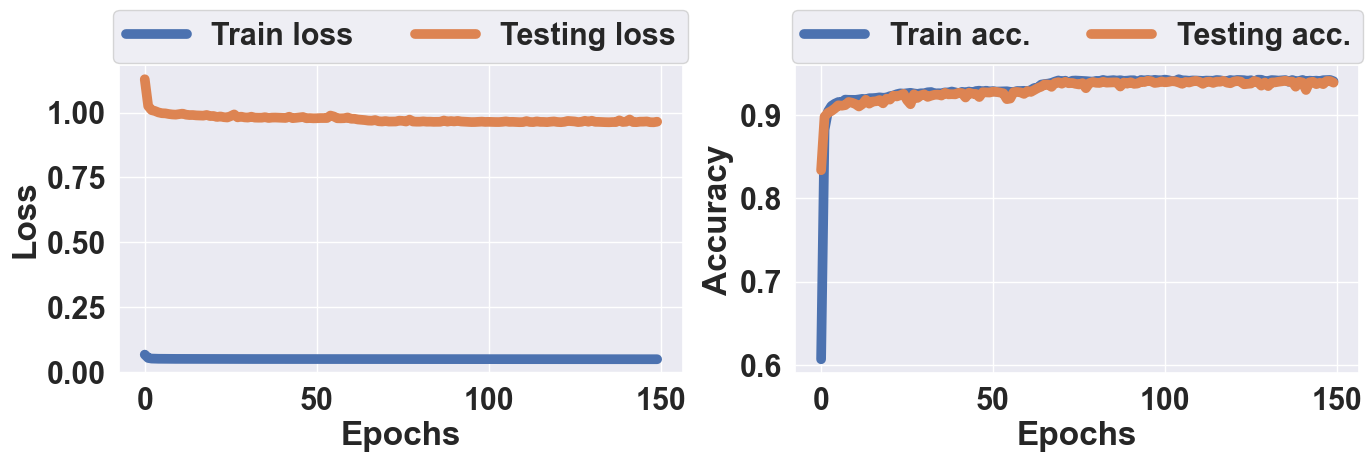

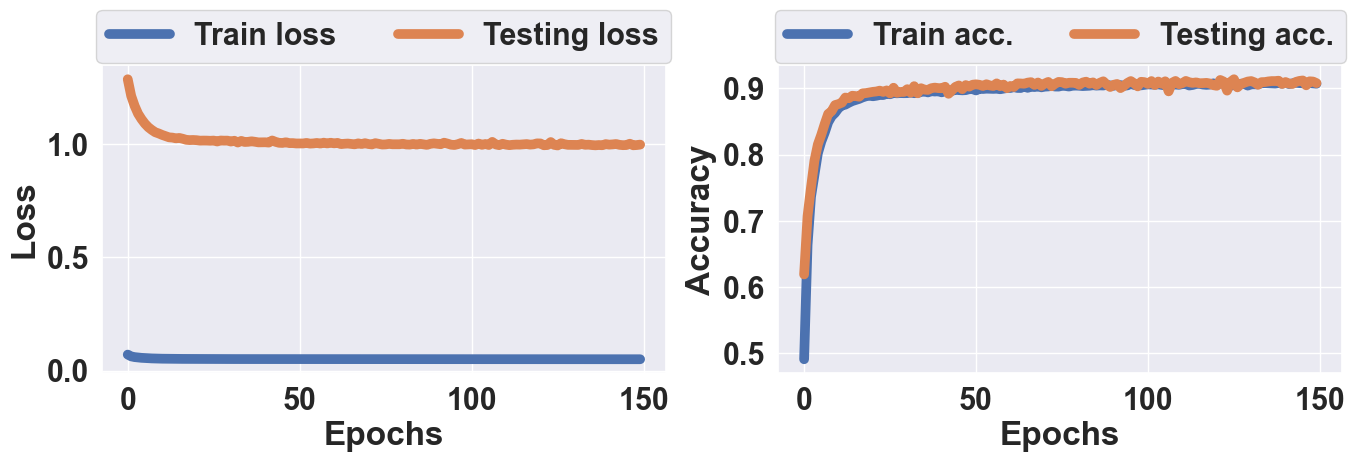

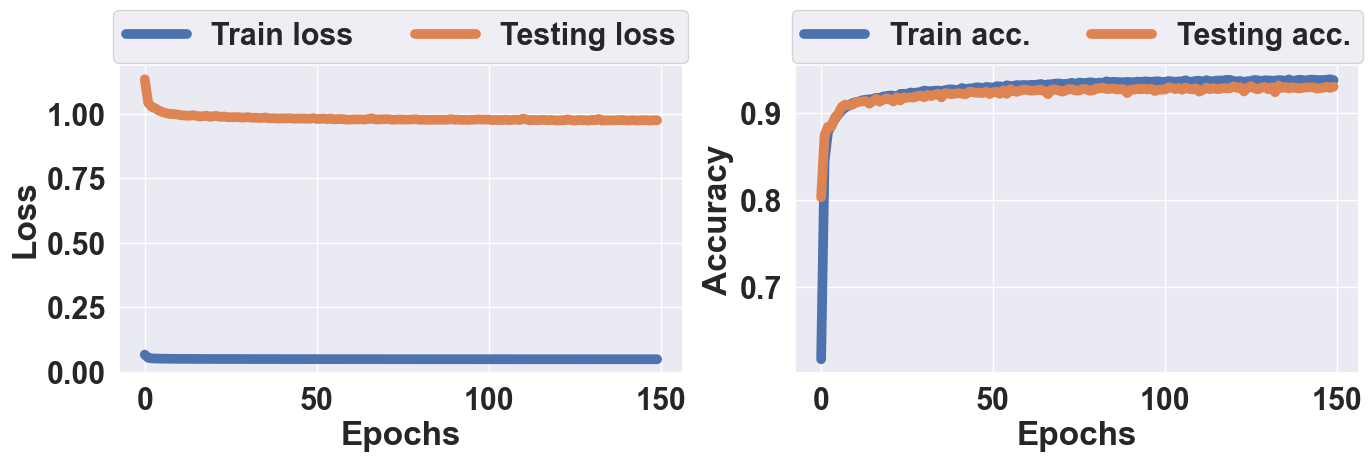

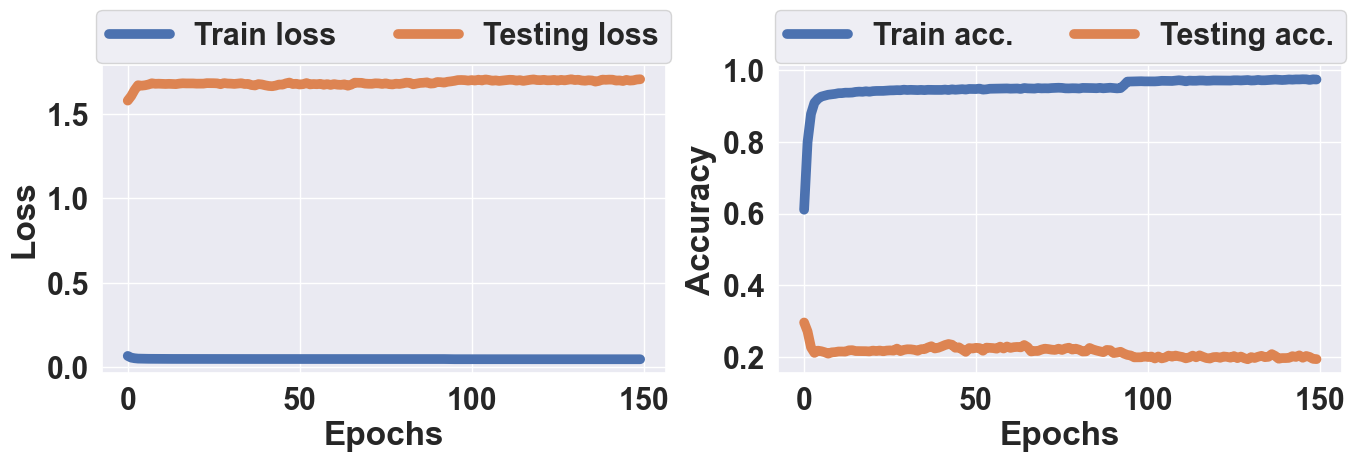

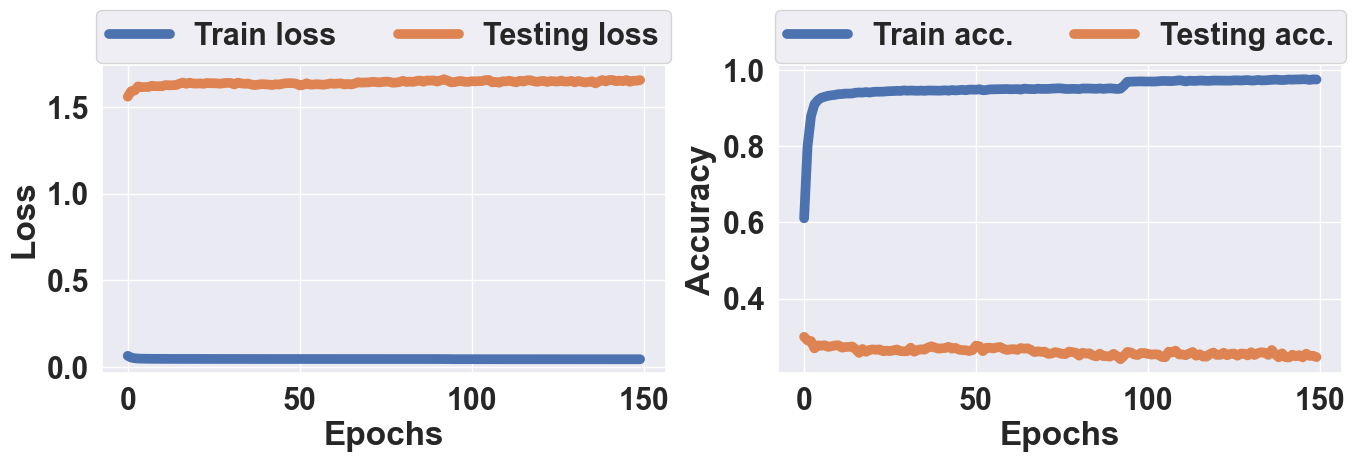

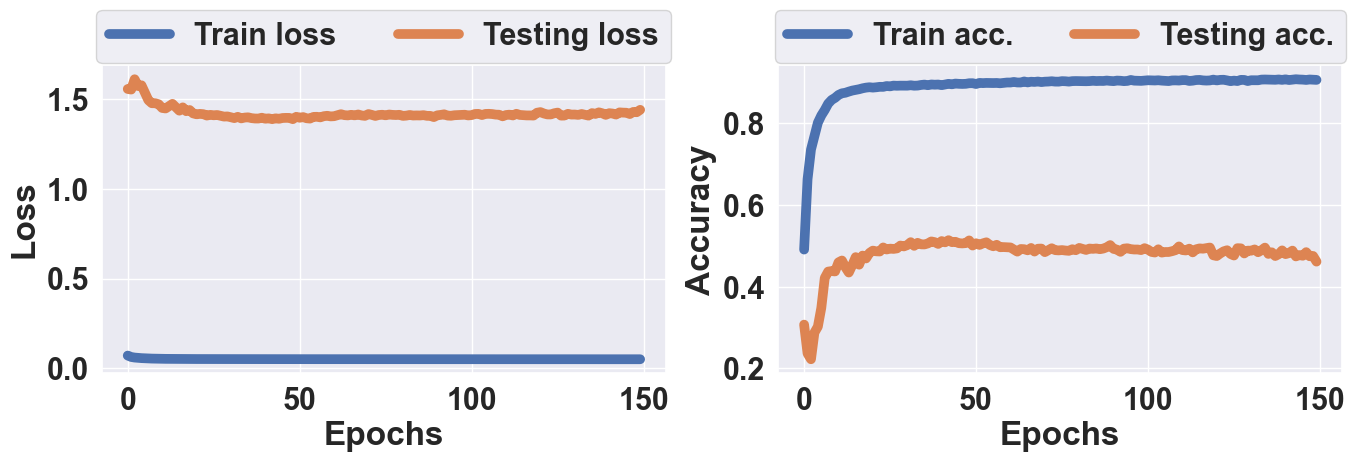

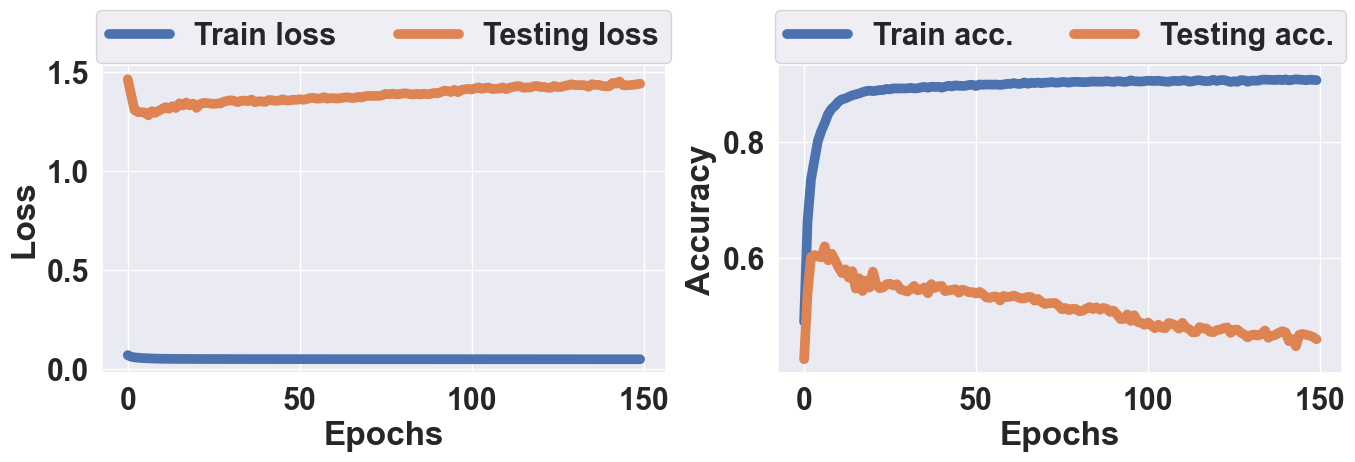

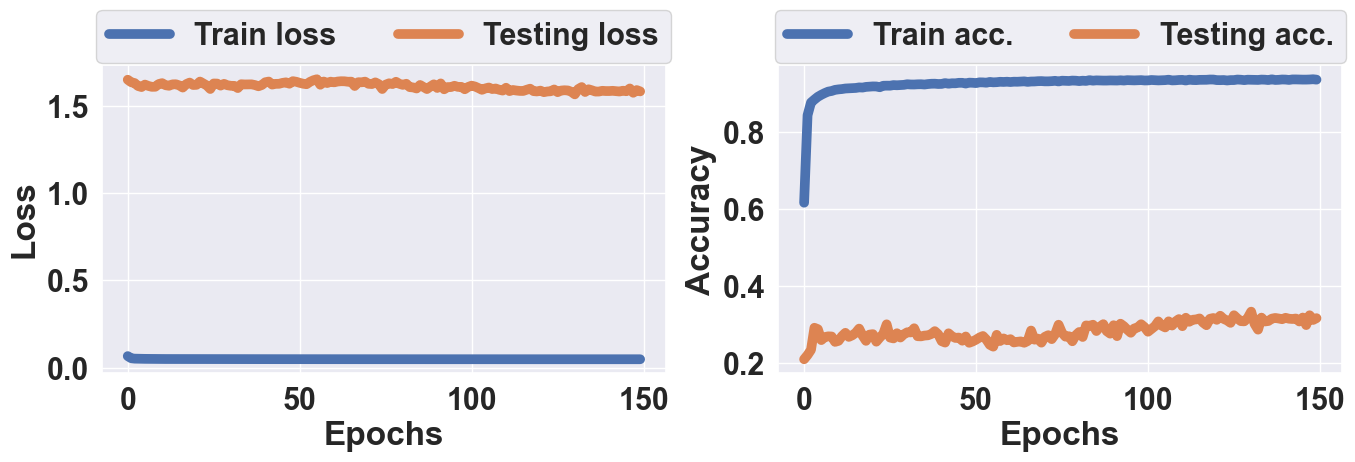

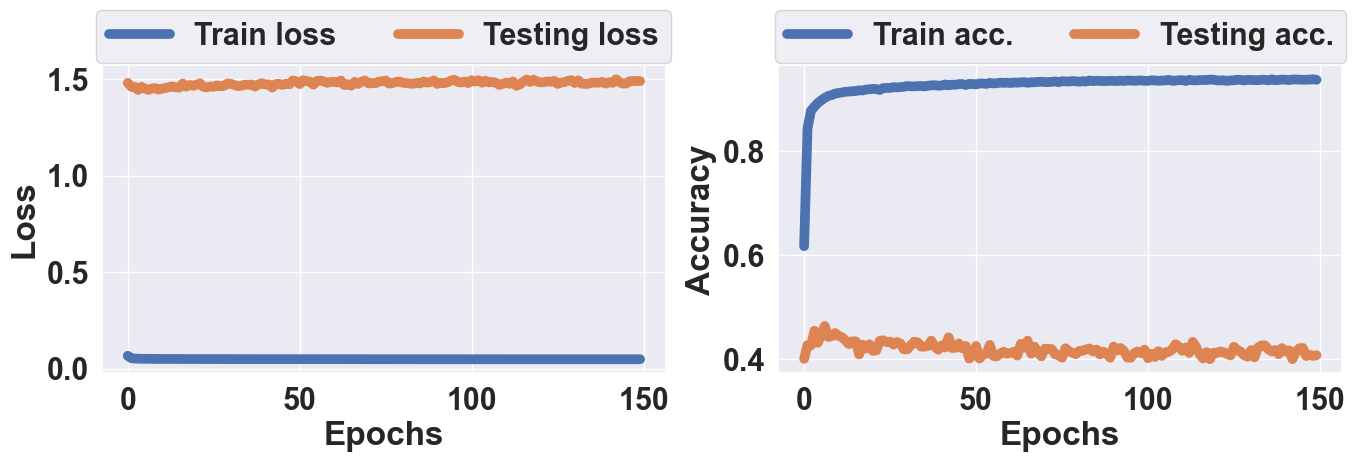

In [ ]:
# Python program to illustrate
# Plotting categorical scatter
# plots with Seaborn

# importing the required module
import matplotlib.pyplot as plt
import seaborn as sns
def drawFigure(history,figurename):
    sns.set(rc={'figure.figsize':(16,4)}, font_scale = 2)
    fig, (ax0,ax1) = plt.subplots(1, 2)
    # plt.rcParams["font.weight"] = "bold"
    # plt.rcParams['font.size'] = 100

    # x axis values
    x = [i for i in range(150)]

    # y axis values
    y = history[0]

    #print(y)
    var = 7

    # plotting strip plot with seaborn
    sns.lineplot(x, y,ax=ax0,linewidth = var)


    y = history[1]
    #print(y)

    sns.lineplot(x, y, ax = ax0,linewidth = var)

    # giving labels to x-axis and y-axis
    ax0.set(xlabel ='Epochs', ylabel ='Loss')
    ax0.set_xlabel(ax0.get_xlabel(), fontdict={'weight': 'bold'})
    ax0.set_ylabel(ax0.get_ylabel(), fontdict={'weight': 'bold'})
    ax0.legend(['Train loss', 'Testing loss'],loc = 'upper center',bbox_to_anchor=(0.5, 1.23),
    ncol=2)

    y = np.array(history[2])


    sns.lineplot(x, y, ax = ax1,linewidth = var)

    y =  np.array(history[3])


    sns.lineplot(x, y,ax=ax1,linewidth = var)

    ax1.set(xlabel ='Epochs', ylabel ='Accuracy')
    ax1.set_xlabel(ax1.get_xlabel(), fontdict={'weight': 'bold'})
    ax1.set_ylabel(ax1.get_ylabel(), fontdict={'weight': 'bold'})
    ax1.legend(['Train acc.', 'Testing acc.'],loc = 'upper center', bbox_to_anchor=(0.5, 1.23),
    ncol=2)
    #plt.tight_layout()
    plt.savefig(figurename+'.PNG', bbox_inches = "tight")
    del history,ax0,ax1


neuron_ = "_16_16x16_16x"

i = 0
for l in listForfigure:
  drawFigure(l,listForfigureName[i]+str(neuron_)+"label_7")
  i+=1
  
  



#  'best'            0
#         'upper right'     1
#         'upper left'      2
#         'lower left'      3
#         'lower right'     4
#         'right'           5
#         'center left'     6
#         'center right'    7
#         'lower center'    8
#         'upper center'    9
#         'center'          10
# function to show plot



     -------------------------------------- 292.8/292.8 kB 6.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\maloy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
53 inch

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)

epoch 149, train acc 0.992, train loss 0.046, test acc 0.989, test loss 0.916
tensor(0.9913)
Accuracy: 0.991
F1_score: 0.991
************************************

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)

epoch 149, train acc 0.816, train loss 0.055, test acc 0.798, test loss 1.106
tensor(0.8040)
Accuracy: 0.804
F1_score: 0.804
************************************

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)

epoch 149, train acc 0.883, train loss 0.051, test acc 0.888, test loss 1.016
tensor(0.8887)
Accuracy: 0.889
F1_score: 0.889
************************************

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)

epoch 149, train acc 0.992, train loss 0.046, test acc 0.331, test loss 1.577
tensor(0.4126)
Accuracy: 0.413
F1_score: 0.413
************************************

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)

epoch 149, train acc 0.992, train loss 0.046, test acc 0.123, test loss 1.777
tensor(0.1421)
Accuracy: 0.142
F1_score: 0.142
************************************

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)

epoch 149, train acc 0.816, train loss 0.055, test acc 0.215, test loss 1.688
tensor(0.2497)
Accuracy: 0.250
F1_score: 0.250
************************************

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)

epoch 149, train acc 0.816, train loss 0.055, test acc 0.068, test loss 1.828
tensor(0.1794)
Accuracy: 0.179
F1_score: 0.179
************************************

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)

epoch 149, train acc 0.883, train loss 0.051, test acc 0.312, test loss 1.586
tensor(0.4286)
Accuracy: 0.429
F1_score: 0.429
************************************

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)

epoch 149, train acc 0.883, train loss 0.051, test acc 0.103, test loss 1.795
tensor(0.1500)
Accuracy: 0.150
F1_score: 0.150
************************************


In [ ]:
#from torch.optim import optimizer
# create some simple NN models to classfi

# don;t change these number unless dataset changes!!!!

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_initialization():
  feature_vector_len = 18 # [num_objects,std,var,mean,min,max,enviroment]
  num_output_classes = 5


  Number_of_neurons = 16



  model3 = nn.Sequential(
      nn.Linear(feature_vector_len,Number_of_neurons),
      nn.ReLU(),
      nn.Linear(Number_of_neurons,Number_of_neurons),
      nn.ReLU(),
      nn.Linear(Number_of_neurons,num_output_classes),
      nn.Softmax()
      )

  


  # pick the active model
  model = model3


  loss_fn = nn.CrossEntropyLoss()
  #optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


  return model,optimizer,loss_fn


def train(X_train,x_valid,y_train, y_valid):


    max_accuracy = 0


    model,optimizer,loss_fn = model_initialization()
    torch.manual_seed(1) # for repeatability, set the random generator seed.
    train_ds = TensorDataset(X_train, y_train)
    batch_size = 20 # set the training batch size.
    train_dl = DataLoader(train_ds, batch_size, shuffle=True)
    num_epochs = 150
    n_train =len(X_train) 

    prediction1 = None
    trueone1 = None

    
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            #pred = model(x_batch)[:, 0] #mac ???
            pred = model(x_batch)
            
            # debug
            #print("PRED shape *************** ", np.shape(pred))
            #print("Y_batch shape *************** ", np.shape(y_batch))            
            #print("PRED  *************** ", pred)
            #print("PRED values *************** ", pred)
            #print("EXPECTED values *************** ", y_batch)
            
            
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            loss_hist_train[epoch] += loss.item()
            is_correct = (pred.argmax(dim=1) == y_batch.argmax(dim=1)).float()
            # print("me")
            # print(is_correct)
            
            accuracy_hist_train[epoch] += is_correct.sum()
        
        loss_hist_train[epoch] /= n_train
        accuracy_hist_train[epoch] /= n_train
        

        #pred = model(x_valid)[:, 0] # mac???
        pred = model(x_valid)        
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        
        prediction = pred.argmax(dim=1)
        trueone = y_valid.argmax(dim=1)
        
        
        is_correct = torch.sum(prediction == trueone)
        
        total_samples = len(trueone)
        
        
        
        
        accuracy_hist_valid[epoch] += is_correct/total_samples

        if(max_accuracy < accuracy_hist_valid[epoch]):
          
          max_accuracy = accuracy_hist_valid[epoch]
          prediction1 = prediction
          trueone1 = trueone
        
        # print('epoch {}, train acc {:.3f}, train loss {:.3f}, test acc {:.3f}, test loss {:.3f}'.
        #       format(epoch, accuracy_hist_train[epoch],loss_hist_train[epoch], accuracy_hist_valid[epoch], loss_hist_valid[epoch]))
        
        if(epoch == 149):
          print('epoch {}, train acc {:.3f}, train loss {:.3f}, test acc {:.3f}, test loss {:.3f}'.
              format(epoch, accuracy_hist_train[epoch],loss_hist_train[epoch], accuracy_hist_valid[epoch], loss_hist_valid[epoch]))
          print(max_accuracy)
          print('Accuracy: %.3f' % accuracy_score(trueone1, prediction1))
          print('F1_score: %.3f' % f1_score(trueone1, prediction1,average='micro'))
          print("************************************")

          
        
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid,prediction,trueone


##### def train(X_train,x_valid,y_train, y_valid):

history_sunny = train(X_sunnyData70, X_sunnyData30,y_sunnyData70, y_sunnyData30)  
history_lablight = train(X_lablightData70, X_lablightData30, y_lablightData70,y_lablightData30)
history_dark = train(X_darkData70, X_darkData30,y_darkData70, y_darkData30)
history_train_sunny_test_dark = train(X_sunnyData70, X_darkData30,y_sunnyData70, y_darkData30)  
history_train_sunny_test_lablight = train(X_sunnyData70, X_lablightData30,y_sunnyData70, y_lablightData30)
history_train_lablight_test_sunny = train(X_lablightData70, X_sunnyData30, y_lablightData70,y_sunnyData30)  
history_train_lablight_test_dark = train(X_lablightData70, X_darkData30, y_lablightData70,y_darkData30)
history_train_dark_test_sunny = train(X_darkData70, X_sunnyData30,y_darkData70, y_sunnyData30)  
history_train_dark_test_lablight = train(X_darkData70, X_lablightData30,y_darkData70, y_lablightData30)  

########\

    

In [ ]:
#from torch.optim import optimizer
# create some simple NN models to classfi

# don;t change these number unless dataset changes!!!!

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_initialization():
  feature_vector_len = 18 # [num_objects,std,var,mean,min,max,enviroment]
  num_output_classes = 5


  Number_of_neurons = 16



  model3 = nn.Sequential(
      nn.Linear(feature_vector_len,Number_of_neurons),
      nn.ReLU(),
      nn.Linear(Number_of_neurons,Number_of_neurons),
      nn.ReLU(),
      nn.Linear(Number_of_neurons,num_output_classes),
      nn.Softmax()
      )

  


  # pick the active model
  model = model3


  loss_fn = nn.CrossEntropyLoss()
  #optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


  return model,optimizer,loss_fn


def train(X_train,x_valid,y_train, y_valid):


    max_accuracy = 0


    model,optimizer,loss_fn = model_initialization()
    torch.manual_seed(1) # for repeatability, set the random generator seed.
    train_ds = TensorDataset(X_train, y_train)
    batch_size = 20 # set the training batch size.
    train_dl = DataLoader(train_ds, batch_size, shuffle=True)
    num_epochs = 150
    n_train =len(X_train) 

    prediction1 = None
    trueone1 = None

    
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            #pred = model(x_batch)[:, 0] #mac ???
            pred = model(x_batch)
            
            # debug
            #print("PRED shape *************** ", np.shape(pred))
            #print("Y_batch shape *************** ", np.shape(y_batch))            
            #print("PRED  *************** ", pred)
            #print("PRED values *************** ", pred)
            #print("EXPECTED values *************** ", y_batch)
            
            
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            loss_hist_train[epoch] += loss.item()
            is_correct = (pred.argmax(dim=1) == y_batch.argmax(dim=1)).float()
            # print("me")
            # print(is_correct)
            
            accuracy_hist_train[epoch] += is_correct.sum()
        
        loss_hist_train[epoch] /= n_train
        accuracy_hist_train[epoch] /= n_train
        

        #pred = model(x_valid)[:, 0] # mac???
        pred = model(x_valid)        
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        
        prediction = pred.argmax(dim=1)
        trueone = y_valid.argmax(dim=1)
        
        
        is_correct = torch.sum(prediction == trueone)
        
        total_samples = len(trueone)
        
        
        
        
        accuracy_hist_valid[epoch] += is_correct/total_samples

        if(max_accuracy < accuracy_hist_valid[epoch]):
          
          max_accuracy = accuracy_hist_valid[epoch]
          prediction1 = prediction
          trueone1 = trueone
        
        # print('epoch {}, train acc {:.3f}, train loss {:.3f}, test acc {:.3f}, test loss {:.3f}'.
        #       format(epoch, accuracy_hist_train[epoch],loss_hist_train[epoch], accuracy_hist_valid[epoch], loss_hist_valid[epoch]))
        
        if(epoch == 149):
          print('epoch {}, train acc {:.3f}, train loss {:.3f}, test acc {:.3f}, test loss {:.3f}'.
              format(epoch, accuracy_hist_train[epoch],loss_hist_train[epoch], accuracy_hist_valid[epoch], loss_hist_valid[epoch]))
          print(max_accuracy)
          print('Accuracy: %.3f' % accuracy_score(trueone1, prediction1))
          print('F1_score: %.3f' % f1_score(trueone1, prediction1,average='micro'))
          print("************************************")

          
        
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid,prediction,trueone


##### def train(X_train,x_valid,y_train, y_valid):

history_sunny = train(X_sunnyData70, X_sunnyData30,y_sunnyData70, y_sunnyData30)  
history_lablight = train(X_lablightData70, X_lablightData30, y_lablightData70,y_lablightData30)
history_dark = train(X_darkData70, X_darkData30,y_darkData70, y_darkData30)
history_train_sunny_test_dark = train(X_sunnyData70, X_darkData30,y_sunnyData70, y_darkData30)  
history_train_sunny_test_lablight = train(X_sunnyData70, X_lablightData30,y_sunnyData70, y_lablightData30)
history_train_lablight_test_sunny = train(X_lablightData70, X_sunnyData30, y_lablightData70,y_sunnyData30)  
history_train_lablight_test_dark = train(X_lablightData70, X_darkData30, y_lablightData70,y_darkData30)
history_train_dark_test_sunny = train(X_darkData70, X_sunnyData30,y_darkData70, y_sunnyData30)  
history_train_dark_test_lablight = train(X_darkData70, X_lablightData30,y_darkData70, y_lablightData30)  

########\

    

In [ ]:
listForfigure = []

listForfigure.append(history_sunny)
listForfigure.append(history_lablight)
listForfigure.append(history_dark)
listForfigure.append(history_train_sunny_test_dark)
listForfigure.append(history_train_sunny_test_lablight)
listForfigure.append(history_train_lablight_test_sunny)
listForfigure.append(history_train_lablight_test_dark)
listForfigure.append(history_train_dark_test_sunny)
listForfigure.append(history_train_dark_test_lablight)


listForfigureName = []

listForfigureName.append("history_tain_and_test_sunny")
listForfigureName.append("history_train_and_test_lablight")
listForfigureName.append("history_train_and_test_dark")
listForfigureName.append("history_train_sunny_test_dark")
listForfigureName.append("history_train_sunny_test_lablight")
listForfigureName.append("history_train_lablight_test_sunny")
listForfigureName.append("history_train_lablight_test_dark")
listForfigureName.append("history_train_dark_test_sunny")
listForfigureName.append("history_train_dark_test_lablight")


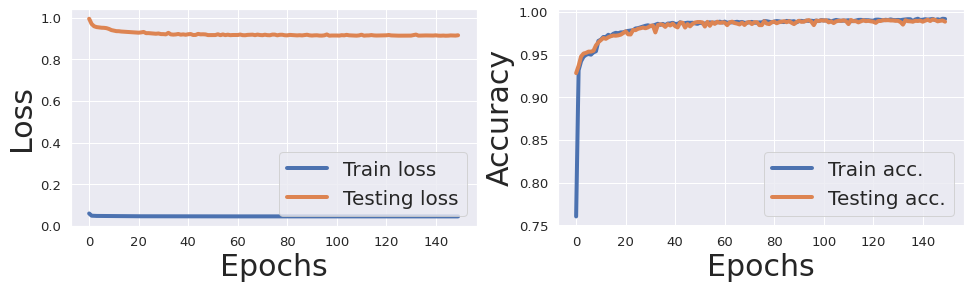

In [ ]:
#Plot the metrics results

def drawFigure(history,figurename):
  fig = plt.figure(figsize=(16, 4))
  ax = fig.add_subplot(1, 2, 1)
  plt.plot(history[0], lw=4)
  plt.plot(history[1], lw=4)
  plt.legend(['Train loss', 'Testing loss'], fontsize=20)
  ax.set_xlabel('Epochs', size=30)
  ax.set_ylabel('Loss', size=30)

  ax = fig.add_subplot(1, 2, 2)
  plt.plot(history[2], lw=4)
  plt.plot(history[3], lw=4)
  plt.legend(['Train acc.', 'Testing acc.'], fontsize=20)
  ax.set_xlabel('Epochs', size=30)
  ax.set_ylabel('Accuracy', size=30)
  plt.savefig(figurename+".png",bbox_inches = "tight")

neuron_ = "_16_16x16_16x"
# print("train_sunny_test_suny_20_20x20_20xLabel")
# drawFigure(history_sunny,"train_sunny_test_suny"+str(neuron_)+"Label")
# print("train_lablight_test_lablight_25_25x25_25x25_2xLabel")
# drawFigure(history_lablight,"train_lablight_test_lablight"+str(neuron_)+"Label")
# print("train_dark_test_dark_25_25x25_25x25_25xLabel")
# drawFigure(history_dark,"train_dark_test_dark"+str(neuron_)+"Label")
i = 0
for l in listForfigure:
  drawFigure(l,listForfigureName[i]+str(neuron_)+"label")
  i+=1
  break
  

In [ ]:
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)

epoch 149, train acc 0.929, train loss 0.049, test acc 0.928, test loss 0.976
tensor(0.9305)
Accuracy: 0.930
F1_score: 0.930
************************************

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)

epoch 149, train acc 0.931, train loss 0.049, test acc 0.926, test loss 0.980
tensor(0.9282)
Accuracy: 0.928
F1_score: 0.928
************************************

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)

epoch 149, train acc 0.958, train loss 0.047, test acc 0.948, test loss 0.956
tensor(0.9496)
Accuracy: 0.950
F1_score: 0.950
************************************

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)

epoch 149, train acc 0.910, train loss 0.050, test acc 0.256, test loss 1.646
tensor(0.3027)
Accuracy: 0.303
F1_score: 0.303
************************************

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)

epoch 149, train acc 0.910, train loss 0.050, test acc 0.314, test loss 1.586
tensor(0.3559)
Accuracy: 0.356
F1_score: 0.356
************************************

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)

epoch 149, train acc 0.931, train loss 0.049, test acc 0.447, test loss 1.457
tensor(0.5301)
Accuracy: 0.530
F1_score: 0.530
************************************

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)

epoch 149, train acc 0.931, train loss 0.049, test acc 0.508, test loss 1.393
tensor(0.5941)
Accuracy: 0.594
F1_score: 0.594
************************************

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)

epoch 149, train acc 0.958, train loss 0.047, test acc 0.283, test loss 1.617
tensor(0.3067)
Accuracy: 0.307
F1_score: 0.307
************************************

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)

epoch 149, train acc 0.958, train loss 0.047, test acc 0.426, test loss 1.470
tensor(0.4449)
Accuracy: 0.445
F1_score: 0.445
************************************


AttributeError: ignored

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
sns.set(rc={'figure.figsize':(9,6)}, font_scale = 1.2)
# sns.set()
sns.plot(x=history[0],y=history[1])
# ax.set(xlabel='activity', ylabel='count')

plt.xlabel('Epochs', fontsize=16);
plt.ylabel('Loss', fontsize=16);



plt.tight_layout()
plt.savefig('activity-distribution.png')

In [ ]:
#Plot the metrics results
def drawFigure(history,figurename):
  fig = plt.figure(figsize=(16, 4))
  ax = fig.add_subplot(1, 2, 1)
  plt.plot(history[0], lw=4)
  plt.plot(history[1], lw=4)
  plt.legend(['Train loss', 'Testing loss'], fontsize=15)
  ax.set_xlabel('Epochs', size=15)
  ax.set_ylabel('Loss', size=15)

  ax = fig.add_subplot(1, 2, 2)
  plt.plot(history[2], lw=4)
  plt.plot(history[3], lw=4)
  plt.legend(['Train acc.', 'Testing acc.'], fontsize=15)
  ax.set_xlabel('Epochs', size=15)
  ax.set_ylabel('Accuracy', size=15)
  plt.savefig(figurename+".png",bbox_inches = "tight")

neuron_ = "_16_16x16_16x"
# print("train_sunny_test_suny_20_20x20_20xLabel")
# drawFigure(history_sunny,"train_sunny_test_suny"+str(neuron_)+"Label")
# print("train_lablight_test_lablight_25_25x25_25x25_2xLabel")
# drawFigure(history_lablight,"train_lablight_test_lablight"+str(neuron_)+"Label")
# print("train_dark_test_dark_25_25x25_25x25_25xLabel")
# drawFigure(history_dark,"train_dark_test_dark"+str(neuron_)+"Label")
i = 0
for l in listForfigure:
  drawFigure(l,listForfigureName[i]+str(neuron_)+"label")
  i+=1
  break


Build confusion matrix to see where how classes are being predicted correclty.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if sys.path[0] == '':


tensor([[ 895,    0,    0,    0,   12],
        [  11,  519,    0,  162,   69],
        [   0,    0, 1407,    0,    0],
        [   0,   21,    7,  984,    1],
        [  14,  128,    0,    0, 1335]])


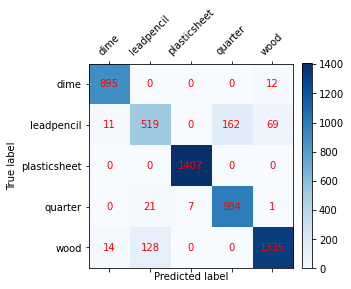

In [ ]:
#from sklearn.metrics import confusion_matrix
from torchmetrics import ConfusionMatrix

def plot_confusion_matrix(cm, conf_name,title='', cmap=plt.cm.Blues, labels=[]):
    #plt.figure(figsize=(10,10))
    plt.matshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Loop over data dimensions and create text annotations.
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            text = plt.text(j, i, cm[i, j].item(),
                        ha="center", va="center", color="red")
   
    plt.savefig(conf_name+".png",bbox_inches = "tight")


confmat = ConfusionMatrix(num_classes=5)
labeling = ['dime', 'leadpencil', 'plasticsheet', 'quarter', 'wood']


prediction = history1[4]
trueone = history1[5]
cm=confmat(prediction, trueone)


plot_confusion_matrix(cm,"confusion_train_sunny_test_sunny", title='',labels=labeling)

print(cm)

In [ ]:
!pip3 install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 419 kB 18.0 MB/s 


In [ ]:
print(onehotencoder_y.categories_[0])

NameError: name 'onehotencoder_y' is not defined

Test Classifier